dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
(442, 10)
(442,)
(442, 10)
(442,)
(353, 10)
(89, 10)
(353,)
(89,)
Epoch 1, Loss: 0.2097
Epoch 100, Loss: 0.0371
Epoch 200, Loss: 0.0338
Epoch 300, Loss: 0.0336
Epoch 400, Loss: 0.0334
Epoch 500, Loss: 0.0333
Epoch 600, Loss: 0.0332
Epoch 700, Loss: 0.0331
Epoch 800, Loss: 0.0330
Epoch 900, Loss: 0.0328
Epoch 1000, Loss: 0.0327
Epoch 1100, Loss: 0.0326
Epoch 1200, Loss: 0.0325
Epoch 1300, Loss: 0.0324
Epoch 1400, Loss: 0.0323
Epoch 1500, Loss: 0.0322
Epoch 1600, Loss: 0.0321
Epoch 1700, Loss: 0.0320
Epoch 1800, Loss: 0.0318
Epoch 1900, Loss: 0.0317
Epoch 2000, Loss: 0.0316
Epoch 2100, Loss: 0.0315
Epoch 2200, Loss: 0.0315
Epoch 2300, Loss: 0.0314
Epoch 2400, Loss: 0.0313
Epoch 2500, Loss: 0.0312
Epoch 2600, Loss: 0.0311
Epoch 2700, Loss: 0.0310
Epoch 2800, Loss: 0.0309
Epoch 2900, Loss: 0.0308
Epoch 3000, Loss

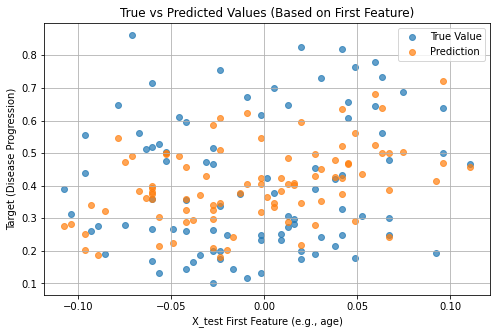

In [1]:
from sklearn.datasets import load_diabetes

# 데이터 불러오기
diabetes = load_diabetes()
print(diabetes.keys())

print(diabetes.feature_names)

import pandas as pd
from sklearn.datasets import load_diabetes

# 피처(X), 타깃(y) 분리
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = pd.Series(diabetes.target)

# 확인
print(df_X.shape)  # (442, 10)
print(df_y.shape)  # (442,)
df_X.head()

X = df_X.values
y = df_y.values
y = y/346

print(X.shape)
print(y.shape)

from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


def model(X, W, b):
    predictions = []
    for i in range(X.shape[0]):  # 샘플 수만큼 반복
        y_pred = 0
        for j in range(len(W)):  # 특성 수만큼 반복
            y_pred += X[i][j] * W[j]
        y_pred += b
        predictions.append(y_pred)
    return np.array(predictions)

def MSE(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

def gradient(X, y, W, b):
    N = len(y)
    y_pred = model(X, W, b)
    
    # W에 대한 기울기: (10,) 벡터
    dW = (2 / N) * X.T.dot(y_pred - y)
    
    # b에 대한 기울기: 스칼라
    db = 2 * (y_pred - y).mean()
    
    return dW, db

import numpy as np
W = np.random.rand(X_train.shape[1])  # 가중치
b = np.random.rand()                  # 편향
LEARNING_RATE = 0.01                  # 학습률


EPOCHS = 10000  # 반복 횟수
loss_list = []  # 손실 값 저장용

for i in range(1, EPOCHS + 1):
    y_pred = model(X_train, W, b)
    loss = MSE(y_train, y_pred)
    
    dW, db = gradient(X_train, y_train, W, b)
    
    # 경사 하강법으로 W, b 업데이트
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    
    loss_list.append(loss)

    # 100번마다 출력
    if i % 100 == 0 or i == 1:
        print(f"Epoch {i}, Loss: {loss:.4f}")
        
y_test_pred = model(X_test, W, b)
test_loss = MSE(y_test, y_test_pred)
print("📉 테스트 데이터 손실 (MSE):", test_loss)        


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 0], y_test, label='True Value', alpha=0.7)
plt.scatter(X_test[:, 0], y_test_pred, label='Prediction', alpha=0.7)
plt.title("True vs Predicted Values (Based on First Feature)")
plt.xlabel("X_test First Feature (e.g., age)")
plt.ylabel("Target (Disease Progression)")
plt.legend()
plt.grid(True)
plt.show()